World Happiness 2019 Dataset 

Linear Regression

In [6]:
import pandas as pd

df2 = pd.read_csv('2019.csv')  
df2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
df2.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [3]:
df2.info() #check for nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
# create new_df2 to condense names of the columns and then create a panda DataFrame happy_df
new_df2 = { 
    'Rank': df2['Overall rank'],
    'Country': df2['Country or region'],
    'Score': df2['Score'],
    'GDP': df2['GDP per capita'],
    'SocialSupport': df2['Social support'],
    'Health': df2['Healthy life expectancy'],
    'Freedom': df2['Freedom to make life choices'],
    'Generosity': df2['Generosity'],
    'Corruption': df2['Perceptions of corruption']
}

happy_df = pd.DataFrame(new_df2)

Visualizing the correlations between the Happiness Score and the variables affecting the score

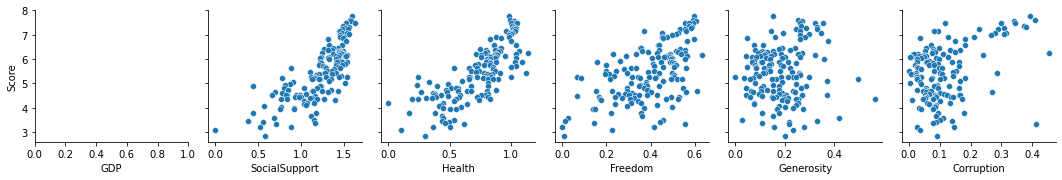

In [5]:
import seaborn as sea
sea.pairplot(data=happy_df[['Score','GDP','SocialSupport','Health','Freedom','Generosity','Corruption']],
             x_vars=['GDP','SocialSupport','Health','Freedom','Generosity','Corruption'],
             y_vars=['Score'])


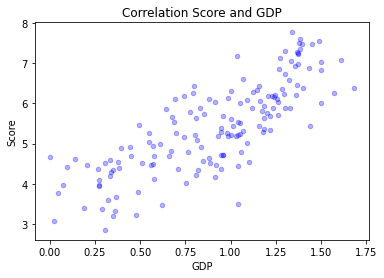

In [8]:
import matplotlib.pyplot as plt

happy_df.plot(kind='scatter',
            x = 'GDP', y='Score',
            color='blue',alpha=0.3,
            title='Correlation Score and GDP')
plt.show()

Creating a Linear Regression Model to Predict the Happiness Score Based on Social Support, GDP, Health, and Freedom

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = happy_df[['GDP', 'SocialSupport', 'Health', 'Freedom']]
y = happy_df[['Score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=30)

lin = LinearRegression() #create linear regression model
lin.fit(x_train,y_train)
print(y_test)
y_pred = lin.predict(x_test)
print(y_pred)

     Score
50   6.021
80   5.323
70   5.529
8    7.278
67   5.648
146  3.597
5    7.480
99   4.913
24   6.446
3    7.494
77   5.386
111  4.668
32   6.293
20   6.825
108  4.700
88   5.208
86   5.247
152  3.231
121  4.490
1    7.600
87   5.211
103  4.799
126  4.418
84   5.265
137  4.107
0    7.769
123  4.461
42   6.125
73   5.467
106  4.719
138  4.085
2    7.554
[[6.23819637]
 [5.5570679 ]
 [5.07089285]
 [6.70985269]
 [5.73895641]
 [3.47660619]
 [6.79638259]
 [5.03424369]
 [6.11003989]
 [6.83145699]
 [5.24103775]
 [3.91510532]
 [6.20391913]
 [6.4283384 ]
 [5.28610047]
 [4.99503825]
 [5.7350012 ]
 [4.50468418]
 [4.24431189]
 [6.75450844]
 [4.96061038]
 [5.14351056]
 [4.00359337]
 [4.63395306]
 [4.69488294]
 [6.72739644]
 [4.91279893]
 [5.89129997]
 [4.91445104]
 [5.22188346]
 [3.73505241]
 [6.90470511]]


Measuring the Accuracy of the Linear Regression Model using mean_squared_error

In [11]:
from sklearn import metrics
import numpy as np

# calculate mean_squared_error using metrics
metrics.mean_squared_error(y_test,y_pred) 

0.2816174263608797